**Test File** 

In [1]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('Cancer.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])
    

In [4]:

# Now `my_spectra` contains the spectra with their coordinates
# You can process or analyze `my_spectra` as needed
print(f"Total spectra loaded: {len(my_spectra)}")


spectrumx = my_spectra[1]
for spectrum in my_spectra[60:70]:
    print(f'Number of recorded mzs: ',len(spectrum[0]))

#    finding max and miz m/z
max_mz = -1
min_mz = 2000
for spectrum in my_spectra:
    temp_max = max(mz for mz in spectrum[0])
    temp_min = min(mz for mz in spectrum[0])
    if temp_min < min_mz:
        min_mz = temp_min
    if temp_max > max_mz:
        max_mz = temp_max

print(f'mz range:',(min_mz,max_mz))


Total spectra loaded: 160000
Number of recorded mzs:  384
Number of recorded mzs:  226
Number of recorded mzs:  73
Number of recorded mzs:  632
Number of recorded mzs:  1463
Number of recorded mzs:  89
Number of recorded mzs:  122
Number of recorded mzs:  202
Number of recorded mzs:  163
Number of recorded mzs:  152
mz range: (100.00021, 1499.9867)


**1. The above cell show that there are only 2 relevant coordinates (x,y) since z=1 for each spectrum**

**From this we can conclude that each spectrum can be plotted on a cartesian plane**

**2. We can see that we always have the same number of intensities as m/z ratios**

**With this array, we can plot the 2D graph of intensities vs m/z for a single pixel point**



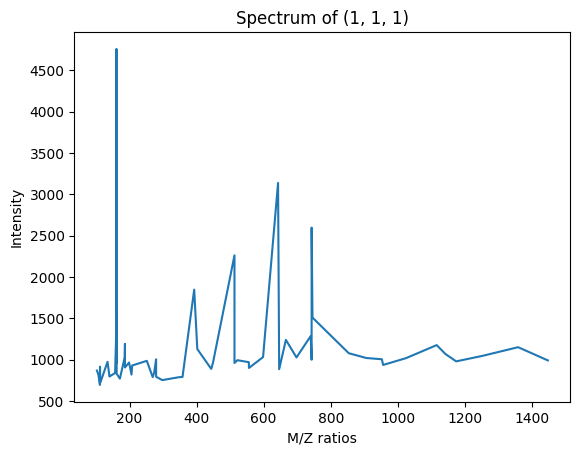

Points found 160000


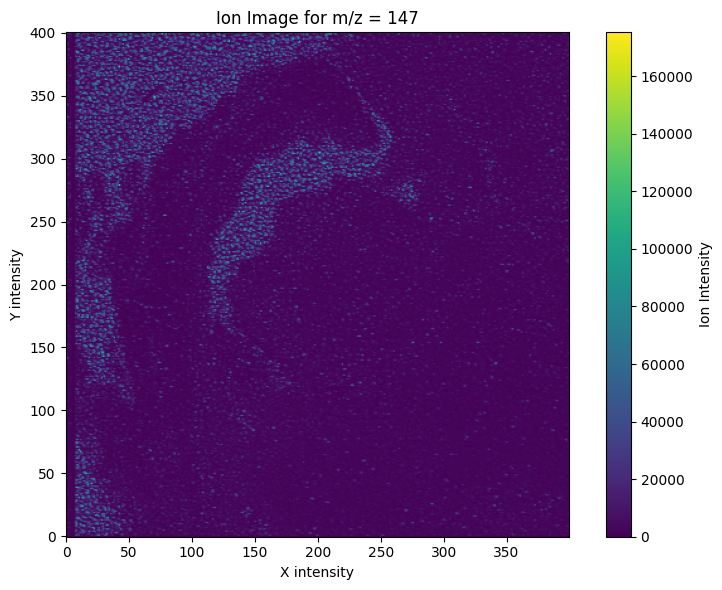

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(spectrumx[0],spectrumx[1])
title = "Spectrum of " + str(spectrumx[2])
plt.title(title)
plt.xlabel("M/Z ratios")
plt.ylabel("Intensity")
plt.show()


# Choose the m/z you want to plot  and tolerance
target_mz = 147
tolerance = 100

# Step 1: Get image dimensions
# all_coords = [coord for _, _, coord in my_spectra]
# xs, ys, _ = zip(*all_coords)
# width = max(xs) + 1
# height = max(ys) + 1
# print(width, height)
width = 400
height = 401


# Step 2: Create empty image
ion_image = np.zeros((height, width))

# Step 3 Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in my_spectra:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Step 4: Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()

**Write data into a file for easier access**

In [4]:
mzs_path = "Data/Cancer/MZs.npy"
intensities_path = "Data/Cancer/Intensities.npy"
coords_path = "Data/Cancer/Coordinates.npy"


mzs_arr = []
intensities_arr = []
coords_arr = []

for mzs, intensities, coords in my_spectra:
    mzs_arr.append(mzs)
    intensities_arr.append(intensities)
    coords_arr.append(coords)

max_mzs_size = max(len(mzs) for mzs in mzs_arr)
max_intensities_size = max(len(i) for i  in intensities_arr)


# For each array in mzs_array pad -1 values to the end of the array
# dtype float16 is used to reduce the memory constraints for my personal PC
mzs_out_array = np.array(  [(np.pad(mzs,(0,max_mzs_size-len(mzs)),"constant" ,constant_values=-1)) for mzs in mzs_arr],dtype=np.float16 )
intensity_out_array = np.array(  [(np.pad(intense,(0,max_intensities_size-len(intense)),"constant" ,constant_values=-1)) for intense in intensities_arr],dtype=np.float16 )


with open(mzs_path, "wb") as file:
    np.lib.format.write_array(file,np.array( mzs_out_array))

with open(intensities_path, "wb") as file:
    np.lib.format.write_array(file,np.array( intensity_out_array))

with open(coords_path, "wb") as file:
    np.lib.format.write_array(file,np.array( coords_arr))




C:\Users\mazar\AppData\Local\Temp\ipykernel_20360\2378124260.py:22: RuntimeWarning: overflow encountered in cast
  intensity_out_array = np.array(  [(np.pad(intense,(0,max_intensities_size-len(intense)),"constant" ,constant_values=-1)) for intense in intensities_arr],dtype=np.float16 )


KeyboardInterrupt: 

2376
2376
[[123.7 140.4 143.8 ...  -1.   -1.   -1. ]]
[ 123.71496  140.37048  143.80493  150.86609  160.68628  160.68909
  160.7366   160.74028  160.7609   160.76385  160.78592  160.89215
  174.53894  186.15329  207.71706  227.21315  232.90128  234.08875
  259.63135  261.11075  268.68063  278.9333   293.95758  293.97565
  347.50793  392.71103  437.07947  488.61786  490.637    512.9333
  558.8165   565.9572   642.9456   728.5181   740.54297  740.5774
  743.1555   743.18964  745.7983   754.7929   916.86096 1126.56
 1274.6716 ]
